In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
from google.colab import files

In [ ]:
data = files.upload()

Saving bank-full.csv to bank-full.csv


In [ ]:
data = pd.read_csv('bank-full.csv', sep=';')

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
data = data.rename(columns={'y':'subscription'})

In [ ]:
data.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
subscription    0
dtype: int64

In [ ]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [ ]:
data['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

In [ ]:
data1 = data.copy()

In [ ]:
data3 = data.copy()

In [ ]:
data1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
#col = data1.select_dtypes(include = 'object')

In [ ]:
#col

In [ ]:
#col.columns

In [ ]:
cols = data1.columns[data1.dtypes.eq('object')] #a trick to select all columns with object data type

In [ ]:
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'subscription'],
      dtype='object')

In [ ]:
'''It can either cast the whole dataframe to a new data type or selected columns to given data types.
DataFrame.astype(self, dtype, copy=True, errors='raise', **kwargs)
# Convert the data type of column Age to float64 & data type of column Marks to string
empDfObj = empDfObj.astype({'Age': 'float64', 'Marks': 'object'})'''
#To convert multiple data types at a time

"It can either cast the whole dataframe to a new data type or selected columns to given data types.\nDataFrame.astype(self, dtype, copy=True, errors='raise', **kwargs)\n# Convert the data type of column Age to float64 & data type of column Marks to string\nempDfObj = empDfObj.astype({'Age': 'float64', 'Marks': 'object'})"

In [ ]:
data3['job'].head(10)

0      management
1      technician
2    entrepreneur
3      bluecollar
4         unknown
5      management
6      management
7    entrepreneur
8         retired
9      technician
Name: job, dtype: object

In [ ]:
data2.iloc[968]

age                      53
job             blue-collar
marital             married
education         secondary
default                  no
balance                 732
housing                 yes
loan                     no
contact             unknown
day                       7
month                   may
duration                530
campaign                  2
pdays                    -1
previous                  0
poutcome            unknown
subscription             no
Name: 968, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           45211 non-null  int64 
 1   job           45211 non-null  object
 2   marital       45211 non-null  object
 3   education     45211 non-null  object
 4   default       45211 non-null  object
 5   balance       45211 non-null  int64 
 6   housing       45211 non-null  object
 7   loan          45211 non-null  object
 8   contact       45211 non-null  object
 9   day           45211 non-null  int64 
 10  month         45211 non-null  object
 11  duration      45211 non-null  int64 
 12  campaign      45211 non-null  int64 
 13  pdays         45211 non-null  int64 
 14  previous      45211 non-null  int64 
 15  poutcome      45211 non-null  object
 16  subscription  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
cols_data = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month', 'poutcome', 'subscription']

In [ ]:
le = LabelEncoder()

In [ ]:
for i in cols_data:
  data3[i] = le.fit_transform(data3[i])
data3.dtypes

age             int64
job             int64
marital         int64
education       int64
default         int64
balance         int64
housing         int64
loan            int64
contact         int64
day             int64
month           int64
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome        int64
subscription    int64
dtype: object

In [ ]:
#data3['subscription'] = data3['subscription'].astype(int)

In [ ]:
#data3["job"] = data3['job'].str.replace('.', '').astype(int) 

In [ ]:
data3["job"].unique()

array(['management', 'technician', 'entrepreneur', 'bluecollar',
       'unknown', 'retired', 'admin.', 'services', 'selfemployed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
data3["job"] = data3['job'].str.replace('-', '')

In [ ]:
data3["job"] = data3['job'].str.replace('.', '')

In [ ]:
data3["job"].unique()

array(['management', 'technician', 'entrepreneur', 'bluecollar',
       'unknown', 'retired', 'admin', 'services', 'selfemployed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
#data1['job'] = data1['job'].astype(int)

In [ ]:
'''data1['marital'] = data1['marital'].astype(int)
data1['education'] = data1['education'].astype(int)
data1['default'] = data1['default'].astype(int)
data1['housing'] = data1['housing'].astype(int)
data1['loan'] = data1['loan'].astype(int)
data1['contact'] = data1['contact'].astype(int)
data1['month'] = data1['month'].astype(int)
data1['poutcome'] = data1['poutcome'].astype(int)
data1['subscription'] = data1['subscription'].astype(int)'''


In [ ]:
'''def columns_to(cols):
  data1['cols'].astype(int)
  return'''

In [ ]:
#columns_to(data1['subscription'])

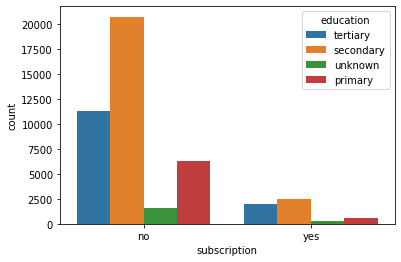

In [ ]:
sns.countplot(x='subscription', data=data, hue='education')

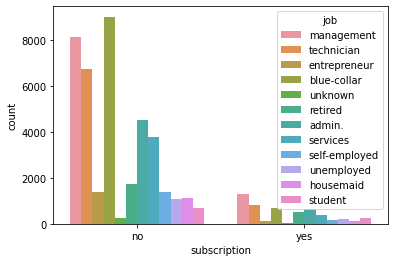

In [ ]:
sns.countplot(x = 'subscription', hue= 'job', data=data)

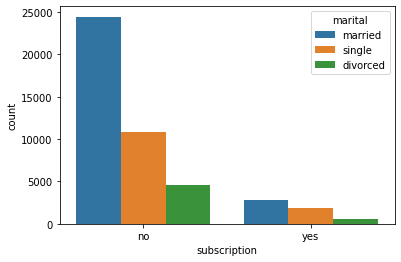

In [ ]:
sns.countplot(x = 'subscription', hue = 'marital', data = data)

In [ ]:
data3.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscription
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3,0
7,42,2,0,2,1,2,1,0,2,5,8,380,1,-1,0,3,0
8,58,5,1,0,0,121,1,0,2,5,8,50,1,-1,0,3,0
9,43,9,2,1,0,593,1,0,2,5,8,55,1,-1,0,3,0


In [ ]:
count_of_nonsubscribe = len(data3[data3['subscription'] == 0])
count_of_subscribe = len(data3[data3['subscription'] == 1])
total = count_of_nonsubscribe + count_of_subscribe
percent_non = count_of_nonsubscribe/total
percent_sub = count_of_subscribe/total
print('Percentage of Non-Subscribers: ',(percent_non)*100)
print('Percentage of Subscribers: ',(percent_sub)*100)

Percentage of Non-Subscribers:  88.30151954170445
Percentage of Subscribers:  11.698480458295547


In [ ]:
data3.groupby('subscription').mean()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
subscription,,,,,,,,,,,,,,,,
0,40.838986,4.291594,1.157632,1.206778,0.019112,1303.714969,0.581008,0.169330,0.688743,15.892290,5.549797,221.182806,2.846350,36.421372,0.502154,2.587997
1,41.670070,4.703347,1.243902,1.360938,0.009832,1804.267915,0.365854,0.091511,0.274154,15.158253,5.320855,537.294574,2.141047,68.702968,1.170354,2.348459


In [ ]:
data3.groupby('education').mean()

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscription
education,,,,,,,,,,,,,,,,
0,45.865567,2.810685,1.014742,0.018537,1250.949934,0.568384,0.149467,0.853014,15.421398,5.764414,255.933002,2.834331,36.081740,0.489272,2.627792,0.086265
1,39.964270,4.477674,1.163865,0.019740,1154.880786,0.605034,0.185458,0.675071,15.759159,5.649427,258.685760,2.700802,42.353504,0.567753,2.551073,0.105594
2,39.593640,4.834298,1.249680,0.014886,1758.416435,0.479513,0.134125,0.443200,16.086535,5.147057,258.518532,2.825577,39.024134,0.661980,2.534922,0.150064
3,44.510501,4.715670,1.193323,0.017232,1526.754443,0.441572,0.071621,0.831449,15.810985,5.745827,257.313947,2.849219,36.856220,0.488422,2.600431,0.135703


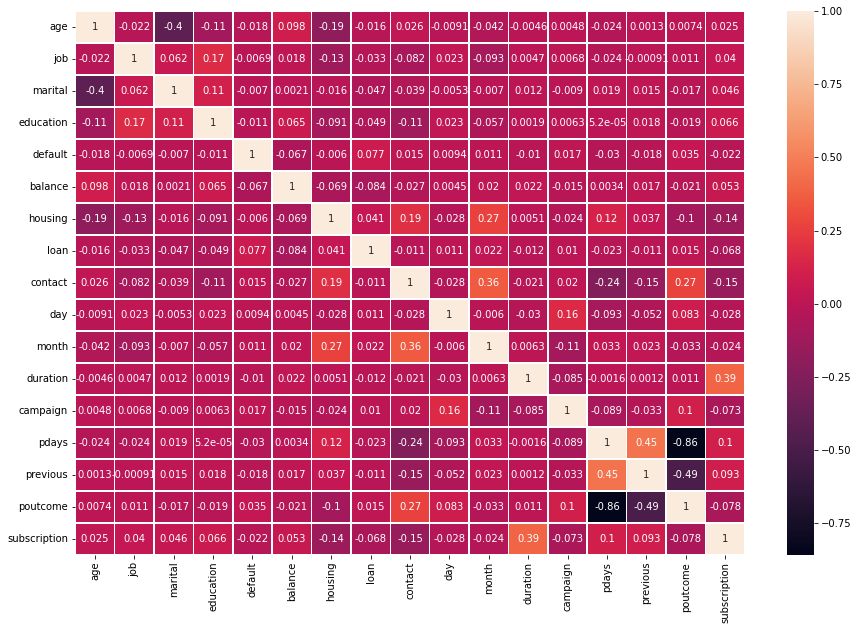

In [ ]:
plt.figure(figsize=(15,10))
cor = data3.corr()
sns.heatmap(cor, linewidths=0.5, annot=True, cmap=None)

In [ ]:
cor_target = abs(cor['subscription'])
relevant_features = cor_target[cor_target>0]
relevant_features

age             0.025155
job             0.040438
marital         0.045588
education       0.066241
default         0.022419
balance         0.052838
housing         0.139173
loan            0.068185
contact         0.148395
day             0.028348
month           0.024471
duration        0.394521
campaign        0.073172
pdays           0.103621
previous        0.093236
poutcome        0.077840
subscription    1.000000
Name: subscription, dtype: float64

In [ ]:
#Our classes are imbalanced, and the ratio of no-subscription to subscription instances is 89:11

In [ ]:
sns.barplot(data['job'],data['subscription'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


TypeError: ignored

Text(0, 0.5, 'Frequency of Purchase')

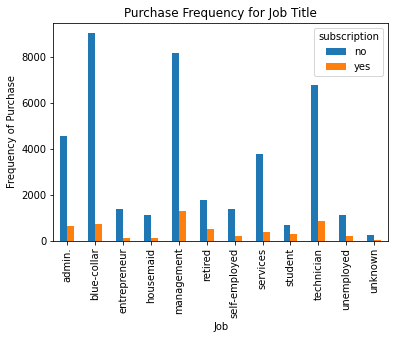

In [ ]:
%matplotlib inline
pd.crosstab(data.job, data.subscription).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

(array([ 1336., 11747., 12925.,  8015.,  7066.,  3312.,   377.,   303.,
          116.,    14.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <a list of 10 Patch objects>)

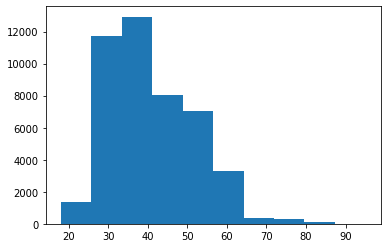

In [ ]:
plt.hist(data3['age'])

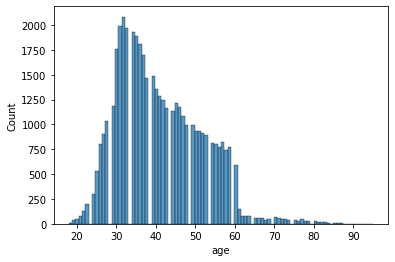

In [ ]:
sns.histplot(data=data3, x= 'age')

In [ ]:
data3.shape

(45211, 17)

In [ ]:
inputs = data3.drop(['subscription'], axis=1)
targets = data3['subscription']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=1)

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
x_train_smote,y_train_smote = smote.fit_resample(x_train,y_train)

In [ ]:
from collections import Counter

In [ ]:
print('Shape of Dataset Before Resampling:', Counter(y_train))
print('Shape of Dataset After Resampling:', Counter(y_train_smote))

Shape of Dataset Before Resampling: Counter({0: 31929, 1: 4239})
Shape of Dataset After Resampling: Counter({0: 31929, 1: 31929})


In [ ]:
lor = LogisticRegression()

In [ ]:
lor.fit(x_train_smote, y_train_smote)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred_lor = lor.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_lor)

0.7958642043569611

In [ ]:
print(classification_report(y_test,y_pred_lor))

              precision    recall  f1-score   support

           0       0.96      0.81      0.87      7993
           1       0.33      0.71      0.45      1050

    accuracy                           0.80      9043
   macro avg       0.64      0.76      0.66      9043
weighted avg       0.88      0.80      0.83      9043



In [ ]:
confusion_matrix(y_test, y_pred_lor)

array([[6448, 1545],
       [ 301,  749]])

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [ ]:
roc_auc_score(y_test,y_pred_lor)

0.7600196004837566

In [ ]:
print(roc_curve(y_test,y_pred_lor))

(array([0.        , 0.19329413, 1.        ]), array([0.        , 0.71333333, 1.        ]), array([2, 1, 0]))


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(x_train_smote,y_train_smote)

DecisionTreeClassifier()

In [ ]:
y_pred_dtc = dtc.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_dtc)

0.846953444653323

In [ ]:
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7993
           1       0.40      0.60      0.48      1050

    accuracy                           0.85      9043
   macro avg       0.67      0.74      0.69      9043
weighted avg       0.88      0.85      0.86      9043



In [ ]:
confusion_matrix(y_test,y_pred_dtc)

array([[7029,  964],
       [ 420,  630]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rtc = RandomForestClassifier()

In [ ]:
rtc.fit(x_train_smote,y_train_smote)

RandomForestClassifier()

In [ ]:
y_pred_rtc = rtc.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_rtc)

0.8833351763795201

In [ ]:
print(classification_report(y_test,y_pred_rtc))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      7993
           1       0.50      0.67      0.57      1050

    accuracy                           0.88      9043
   macro avg       0.73      0.79      0.75      9043
weighted avg       0.90      0.88      0.89      9043



In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(x_train_smote,y_train_smote)

XGBClassifier()

In [ ]:
y_pred_xgb = xgb.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_xgb)

0.8451841203140551

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()

In [ ]:
svc.fit(x_train_smote,y_train_smote)

SVC()

In [ ]:
y_pred_svc = svc.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred_svc)

0.7682185115558996